In [31]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Diabetes Data Analysis Project

An analysis of a diabetes dataset by Marta Balbo

## Overview

The dataset contains data collected by the Iraqi society, acquired from the laboratory of Medical City Hospital and the Specializes Center for Endocrinology and Diabetes-Al-Kindy Teaching Hospital. The columns in the dataset are:

* **ID**. Unique patient ID.
* **Gender**. Biological sex of the patient. Usually encoded as: 0=Female, 1=Male.
* **AGE**. Age of patient in years.
* **Urea** Measures the level of urea in the blood (mg/dL). High levels may indicate kidney issues, common complications of diabetics. Normal range: 7-20 mg/dL.
* **Cr** (Creatinine). Measures the level of creatine in the blood (mg/dL). High levels may indicate kidney issues, common complications of diabetics. Normal range: 0.6-1.3 mg/dL.
* **HbA1c** (Glycated Hemoglobin). Indicator of average blood glucose levels over the past 2-3 months. Normal: $ < $ 5.7%. Prediabetic: 5.7-6.4%. Diabetic: $ \geq $ 6.5%.
* **Chol** (Cholesterol). Measures the level of cholesterol in the blood (mg/dL). High levels are a risk factor for cardiovascular disease, common complications of diabetics. Normal range: $ < $ 200 mg/dL.
* **TG** (Triglycerides). Measures the level of fat in the blood (mg/dL). High levels is associated with insulin resistance and metabolic syndrome. Normal range: $ < $ 150 mg/dL.
* **HDL** (High-Density Lipoprotein). Measures the level of "good" cholesterol (mg/dL). Helps remove excess cholesterol from the bloodstream. Ideal: $ > $ 40 mg/dL (men), $ > $ 50 mg/dL (women).
* **LDL** (Low-Density Lipoprotein). Measures the level of "bad" cholesterol (mg/dL). Contributes to plaque buildup in the arteries. Ideal: $ < $ 100 mg/dL.
* **VLDL** (Very Low-Density Lipoprotein). Measures the level of  another "bad" cholesterol (mg/dL), carries triglycerides. Often estimated from TG/5. High levels are associated with increased diabetes risk. Normal: 2-30 mg/dL.
* **BMI** (Body Mass Index). Measure of body fat based on height and weight (kg/m $ ^2 $). Obesity is a risk factor for Type 2 diabetes. Underweight: $ < $ 18.5, Normal: 18.5-24.9, Overweight: 25-29.9, Obese: $ \geq $ 30.
* **CLASS**. Indicates whether the patient is Non-Diabetic ('N'), is Diabetic ('Y') or is Predict-Diabetic ('P').

**Source:**

Rashid, Ahlam (2020), “Diabetes Dataset”, Mendeley Data, V1, doi: 10.17632/wj9rwkp9c2.1



In [ ]:
def load_data(path='Multiclass Diabetes Dataset - Original.csv'):
    df = pd.read_csv(path)

    df.drop(columns=['No_Pation'], inplace=True)
    
    return df

In [ ]:
df = load_data()

print(df)
print(df.columns)

      ID Gender  AGE  Urea  Cr  HbA1c  Chol   TG  HDL  LDL  VLDL   BMI CLASS
0    502      F   50   4.7  46    4.9   4.2  0.9  2.4  1.4   0.5  24.0     N
1    735      M   26   4.5  62    4.9   3.7  1.4  1.1  2.1   0.6  23.0     N
2    420      F   50   4.7  46    4.9   4.2  0.9  2.4  1.4   0.5  24.0     N
3    680      F   50   4.7  46    4.9   4.2  0.9  2.4  1.4   0.5  24.0     N
4    504      M   33   7.1  46    4.9   4.9  1.0  0.8  2.0   0.4  21.0     N
..   ...    ...  ...   ...  ..    ...   ...  ...  ...  ...   ...   ...   ...
995  200      M   71  11.0  97    7.0   7.5  1.7  1.2  1.8   0.6  30.0     Y
996  671      M   31   3.0  60   12.3   4.1  2.2  0.7  2.4  15.4  37.2    Y 
997  669      M   30   7.1  81    6.7   4.1  1.1  1.2  2.4   8.1  27.4    Y 
998   99      M   38   5.8  59    6.7   5.3  2.0  1.6  2.9  14.0  40.5    Y 
999  248      M   54   5.0  67    6.9   3.8  1.7  1.1  3.0   0.7  33.0    Y 

[1000 rows x 13 columns]
Index(['ID', 'Gender', 'AGE', 'Urea', 'Cr', 'HbA1c

## Project Questions and Objectives

* Considering age, gender, BMI, blood sugar level and cholesterol, which of these factors are risk factors for Type 2 diabetes?
* Develop a machine learning model that can predict diabetes status (Diabetic, Non-Diabetic or Predict-Diabetic). 


## Data Cleaning

The first step in the process is cleaning the data, beginning by removing null values and duplicates. Note how the removal of null values is not necessary, because there aren't any.

In [ ]:
# data cleaning: eliminate duplicates and null values, if any
def clean_data(df):
    print(df.isna().any())
    df.dropna(inplace=True)

    df.drop_duplicates(['Gender', 'AGE', 'Urea', 'Cr', 'HbA1c', 'Chol', 'TG', 'HDL', 'LDL', 'VLDL', 'BMI', 'CLASS'], inplace=True)

    df.reset_index(drop=True, inplace=True)

clean_data(df)

ID        False
Gender    False
AGE       False
Urea      False
Cr        False
HbA1c     False
Chol      False
TG        False
HDL       False
LDL       False
VLDL      False
BMI       False
CLASS     False
dtype: bool


## Additional Pre-Processing:

Notice that the 'Gender' and 'CLASS' columns are categorical columns. We will encode them, but first let's check how many values appear in each column.

In [35]:
def data_exploration(df):
    # find problems in categorical rows
    print(df['Gender'].unique()) 
    print(df['CLASS'].unique())
    
    # find how big are problems in categorical rows
    print(df['Gender'].value_counts())
    print(df['CLASS'].value_counts())

data_exploration(df)


['F' 'M' 'f']
['N' 'N ' 'P' 'Y' 'Y ']
Gender
M    467
F    363
f      1
Name: count, dtype: int64
CLASS
Y     691
N      95
P      40
Y       4
N       1
Name: count, dtype: int64


The unexpected values are relatively few, so we can just ignore them and drop those rows from the dataset.

We'll encode the columns with $$ [F=0, M=1] $$ for 'Gender', and with $$ [N=0, P=1, Y=2] $$ for 'CLASS'.

In [36]:
# pre-process: encode categorical variables
def pre_process_data(df):
    # drop 'N ' and 'Y ' values from 'CLASS', and 'f' values from 'Gender' (they are a small enough number)
    df.drop(df[(df['CLASS']=='Y ') | (df['CLASS']=='N ') | (df['Gender']=='f')].index, inplace=True)
    
    # encode 'Gender' and 'CLASS' columns: [F=0, M=1] and ['N'=0, 'P'=1, 'Y'=2]
    enc = OrdinalEncoder()
    df[['Gender', 'CLASS']] = enc.fit_transform(df[['Gender', 'CLASS']])
    
    return df

pre_process_data(df)

,ID,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502,0.0,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0.0
1,735,1.0,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,0.0
2,504,1.0,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,0.0
3,634,0.0,45,2.3,24,4.0,2.9,1.0,1.0,1.5,0.4,21.0,0.0
4,721,0.0,50,2.0,50,4.0,3.6,1.3,0.9,2.1,0.6,24.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
821,194,0.0,57,4.1,70,9.3,5.3,3.3,1.0,1.4,1.3,29.0,2.0
823,196,1.0,55,3.1,39,8.5,5.0,2.5,1.9,2.9,0.7,27.0,2.0
824,198,1.0,28,3.5,61,8.5,4.5,1.9,1.1,2.6,0.8,37.0,2.0
825,199,1.0,69,10.3,185,7.7,4.9,1.9,1.2,3.0,0.7,37.0,2.0


## Exploratory Data Analysis (EDA):

We want to visualize the distribution of the factors we are considering (age, gender, BMI, blood sugar level and cholesterol), both on the whole population and by class. 

We use histograms to visualize the distribution, and boxplots to see whether the distribution is simmetrical or skewed.

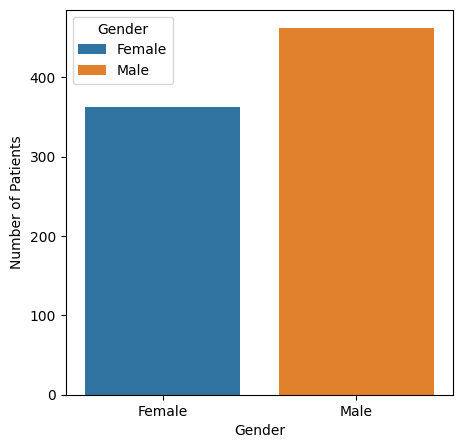

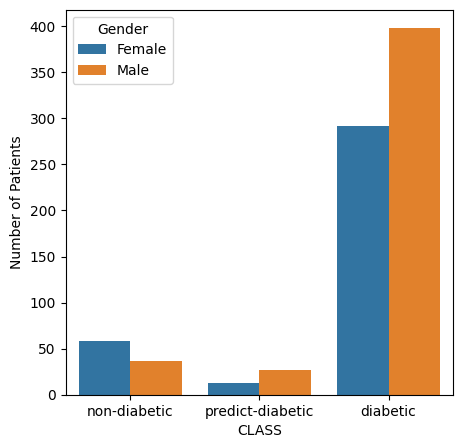

In [37]:
def plot_gender(df):
    # visualize the correlation between gender and class
    df_reduced = df[['Gender', 'CLASS']]

    # plot the gender distribution
    
    df1 = df_reduced.groupby(['Gender']).size().reset_index(name='number_patients')

    plt.figure(figsize=(5, 5))
    ax = sns.barplot(x='Gender', y='number_patients', hue='Gender', data=df1)
    plt.ylabel("Number of Patients")

    legend = ax.get_legend()
    handles = legend.legend_handles
    ax.legend(handles, ["Female","Male"], title='Gender')

    ax.set_xticks(range(2))
    ax.set_xticklabels(['Female', 'Male'])
    
    # plot the gender distribution by class

    df2 = df_reduced.groupby(['Gender', 'CLASS']).size().reset_index(name='number_patients')

    plt.figure(figsize=(5, 5))
    ax = sns.barplot(x='CLASS', y='number_patients', hue='Gender', data=df2)
    plt.ylabel("Number of Patients")
    
    legend = ax.get_legend()
    handles = legend.legend_handles
    ax.legend(handles, ["Female","Male"], title='Gender')

    ax.set_xticks(range(3))
    ax.set_xticklabels(['non-diabetic', 'predict-diabetic', 'diabetic'])

plot_gender(df)

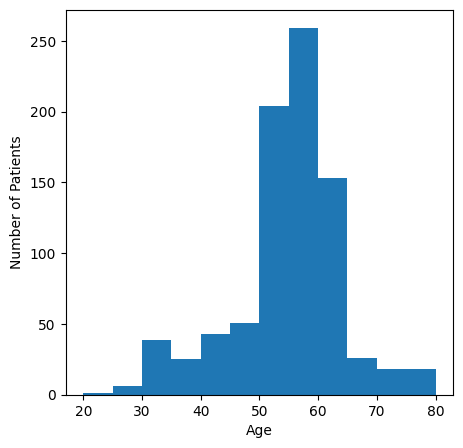

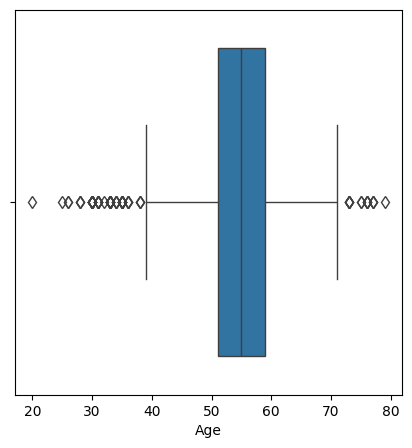

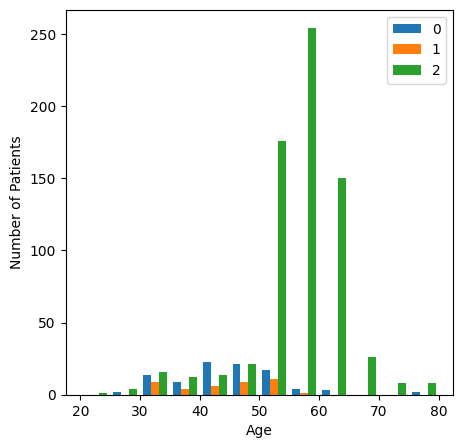

In [38]:
def plot_age(df):
    # visualize the correlation between age and class
    # plot the Age distribution with histogram

    plt.figure(figsize=(5,5))
    ax = plt.hist(df['AGE'], [20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 80])
    plt.xlabel("Age")
    plt.ylabel("Number of Patients")
    #plt.title = ('Age Distrubtion')

    # plot the Age distribution with boxplot

    plt.figure(figsize=(5,5))
    ax = sns.boxplot(x=df['AGE'], flierprops={"marker": "d"})
    plt.xlabel("Age")

    # plot the Age distribution by class

    diabetic = df[df['CLASS']==0]
    predict_diabetic = df[df['CLASS']==1]
    non_diabetic = df[df['CLASS']==2]

    plt.figure(figsize=(5,5))
    ax = plt.hist([diabetic['AGE'], predict_diabetic['AGE'], non_diabetic['AGE']], [20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80])
    plt.xlabel("Age")
    plt.ylabel("Number of Patients")
    plt.legend([0,1,2])

plot_age(df)

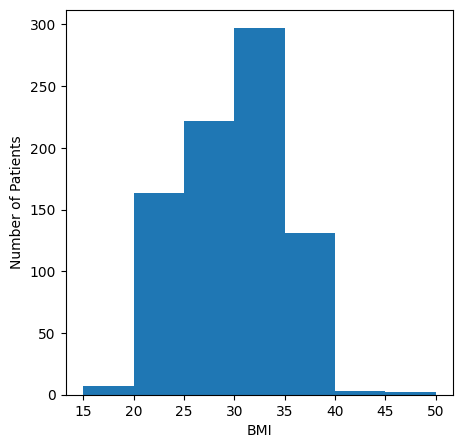

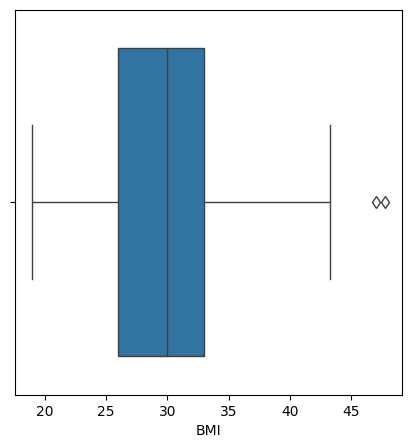

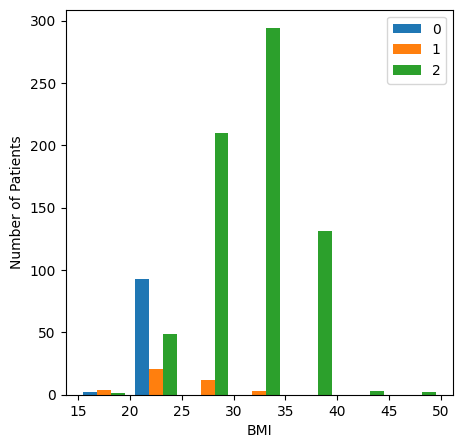

In [39]:
def plot_BMI(df):
     
    # visualize the correlation between BMI and class
    # plot the BMI distribution with histogram

    plt.figure(figsize=(5,5))
    ax = plt.hist(df['BMI'], [15, 20, 25, 30, 35, 40, 45, 50])
    plt.xlabel("BMI")
    plt.ylabel("Number of Patients")

    # plot the BMI distribution with boxplot

    plt.figure(figsize=(5,5))
    ax = sns.boxplot(x=df['BMI'], flierprops={"marker": "d"})
    plt.xlabel("BMI")

    # plot the BMI distribution by class

    diabetic = df[df['CLASS']==0]
    predict_diabetic = df[df['CLASS']==1]
    non_diabetic = df[df['CLASS']==2]

    plt.figure(figsize=(5,5))
    ax = plt.hist([diabetic['BMI'], predict_diabetic['BMI'], non_diabetic['BMI']], [15, 20, 25, 30, 35, 40, 45, 50])
    plt.xlabel("BMI")
    plt.ylabel("Number of Patients")
    plt.legend([0,1,2])

plot_BMI(df)

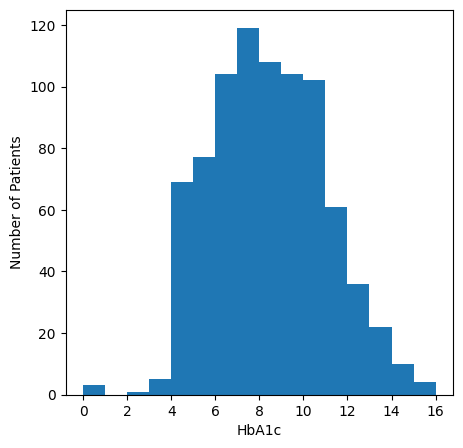

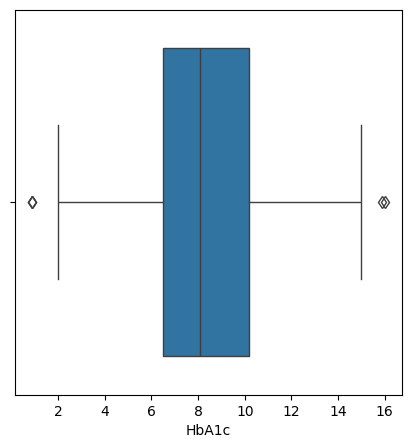

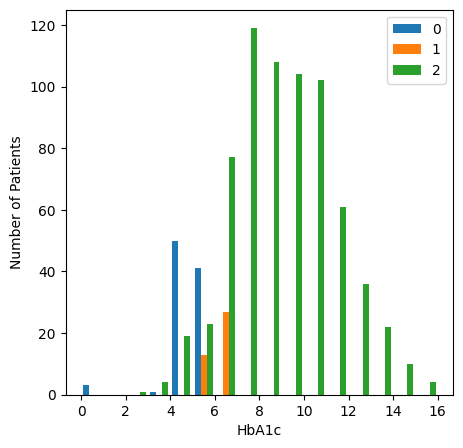

In [40]:
def plot_HbA1c(df):
     
    # visualize the correlation between HbA1c and class
    # plot the HbA1c distribution with histogram

    plt.figure(figsize=(5,5))
    ax = plt.hist(df['HbA1c'], [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16])
    plt.xlabel("HbA1c")
    plt.ylabel("Number of Patients")

    # plot the HbA1c distribution with boxplot

    plt.figure(figsize=(5,5))
    ax = sns.boxplot(x=df['HbA1c'], flierprops={"marker": "d"})
    plt.xlabel("HbA1c")

    # plot the HbA1c distribution by class

    diabetic = df[df['CLASS']==0]
    predict_diabetic = df[df['CLASS']==1]
    non_diabetic = df[df['CLASS']==2]

    plt.figure(figsize=(5,5))
    ax = plt.hist([diabetic['HbA1c'], predict_diabetic['HbA1c'], non_diabetic['HbA1c']], [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16])
    plt.xlabel("HbA1c")
    plt.ylabel("Number of Patients")
    plt.legend([0,1,2])

plot_HbA1c(df)

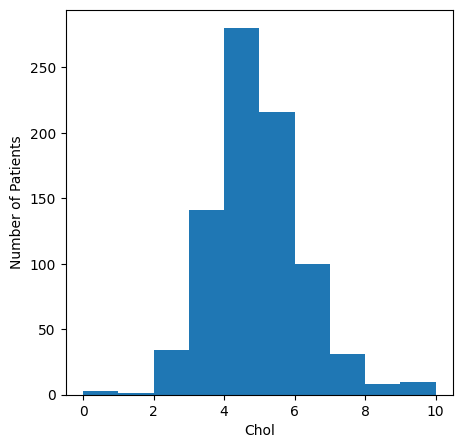

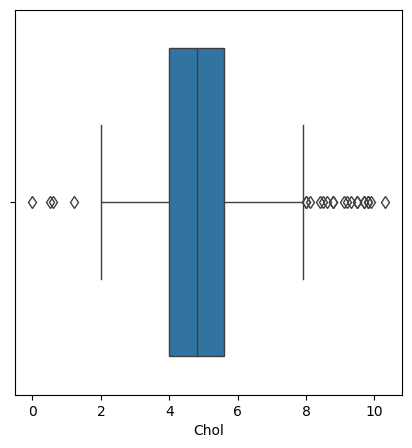

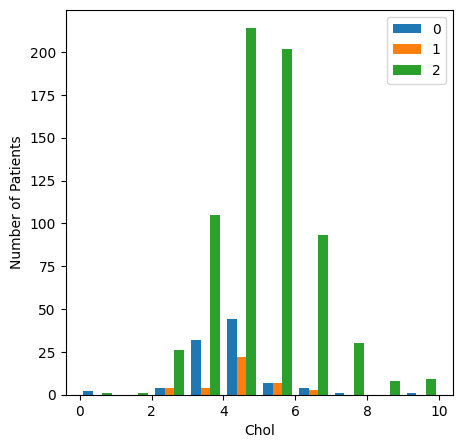

In [41]:
def plot_Chol(df):
     
    # visualize the correlation between Chol and class
    # plot the Chol distribution with histogram

    plt.figure(figsize=(5,5))
    ax = plt.hist(df['Chol'], [0,1,2,3,4,5,6,7,8,9,10])
    plt.xlabel("Chol")
    plt.ylabel("Number of Patients")

    # plot the Chol distribution with boxplot

    plt.figure(figsize=(5,5))
    ax = sns.boxplot(x=df['Chol'], flierprops={"marker": "d"})
    plt.xlabel("Chol")

    # plot the Chol distribution by class

    diabetic = df[df['CLASS']==0]
    predict_diabetic = df[df['CLASS']==1]
    non_diabetic = df[df['CLASS']==2]

    plt.figure(figsize=(5,5))
    ax = plt.hist([diabetic['Chol'], predict_diabetic['Chol'], non_diabetic['Chol']], [0,1,2,3,4,5,6,7,8,9,10])
    plt.xlabel("Chol")
    plt.ylabel("Number of Patients")
    plt.legend([0,1,2])

plot_Chol(df)

## Hypotesis Testing

Based on the exploratory data analysis we conducted, we want to verify whether each of the factors considered (gender, age, BMI, cholesterol level, and blood glucose level) influences the risk of developing Type 2 diabetes. 


The first hypotesis we consider, called Hypotesis 1, regards the gender of the patient.

### Hypotesis 1

* **Null Hypotesis $ H_0 $**: female and male patients have equal risk of developing diabetes

* **Alternative Hypotesis $ H_1 $**: female and male patients do not have equal risk of developing diabetes


To test the first hypotesis, we use the $ \chi ^ 2 $ test of independence.

In [42]:
from scipy.stats import chi2_contingency

def chi_square_p_value(df, index_col, column_col):
    observations = pd.crosstab(index=df[index_col], columns=df[column_col],margins=True)
    chi2, p, dof, ex = chi2_contingency(observations)

    return p

print("p =", chi_square_p_value(df, "Gender", "CLASS"))


p = 0.028005557466185264


With $ \alpha = 0.05 $, we reject the null hypotesis and we accept the alternative hypotesis. We can conclude that the gender of the patients influences the risk of developing diabetes.

The subsequent hypoteses regard the rest of the factors. We will use the same method to test these hypotesis.

### Hypotesis 2

* **Null Hypotesis $ H_0 $**: there is no difference in age among diabetic, non-diabetic, and predict-diabetic people

* **Alternative Hypotesis $ H_1 $**: there is a difference in age among diabetic, non-diabetic, and predict-diabetic people


### Hypotesis 3

* **Null Hypotesis $ H_0 $**: there is no difference in BMI among diabetic, non-diabetic, and predict-diabetic people

* **Alternative Hypotesis $ H_1 $**: there is a difference in BMI among diabetic, non-diabetic, and predict-diabetic people


### Hypotesis 4

* **Null Hypotesis $ H_0 $**: there is no difference in cholesterol level among diabetic, non-diabetic, and predict-diabetic people

* **Alternative Hypotesis $ H_1 $**: there is a difference in cholesterol level among diabetic, non-diabetic, and predict-diabetic people


### Hypotesis 5

* **Null Hypotesis $ H_0 $**: there is no difference in glucose level among diabetic, non-diabetic, and predict-diabetic people

* **Alternative Hypotesis $ H_1 $**: there is a difference in glucose level among diabetic, non-diabetic, and predict-diabetic people



To test these hypoteses, we use could use the one-way ANOVA, but first we have to check whether some assumptions about the residuals are true.

We can assume that the observations are independent from one another (because we eliminated the duplicates, so each observation refers to a different patient).

We then have to test for the normality and the homogeneity of variance.

Let's test first for the homogeneity of variance, using the Levene's test.

In [43]:
# levene's test for homogeneity of variance
import pingouin as pg

variables = ['AGE', 'BMI', 'Chol', 'HbA1c']

results = []
for var in variables:
    res = pg.homoscedasticity(data=df, 
                    dv=var, 
                    group="CLASS",
                    method='levene')
    res['variable'] = var
    results.append(res)

results_df = pd.concat(results, ignore_index = True)

# results: W statistic (used to calculate the p-value), p-value, whether the variance is homogeneous or not and variable


print(results_df)

           W          pval  equal_var variable
0   7.907853  3.965379e-04      False      AGE
1  33.444493  1.086386e-14      False      BMI
2   3.464882  3.173427e-02      False     Chol
3  67.522324  7.066155e-28      False    HbA1c


The Levene test shows that the variance is not homogeneous for each of the variables considered.

Now we'll test the normality assumption, using Shapiro-Wilk test.

In [44]:
#Shapiro-Wilk test with Pingouin

#variables = ['AGE', 'BMI', 'Chol', 'HbA1c']

results = []

for var in variables:
    df_reduced = df[['CLASS', var]]
    res = pg.normality(data=df_reduced, dv=var, group='CLASS', method='shapiro')
    res['variable'] = var
    results.append(res)

results_df = pd.concat(results)

# results: W statistic (between 0 and 1, close to 1 indicates closeness to normal distribution), p-value, whether the null hypotesis of normality is rejected or not and variable

print(results_df)

              W          pval  normal variable
CLASS                                         
0.0    0.943575  4.675616e-04   False      AGE
1.0    0.870684  2.980315e-04   False      AGE
2.0    0.882678  1.994845e-22   False      AGE
0.0    0.904004  3.647965e-06   False      BMI
1.0    0.915101  5.419163e-03   False      BMI
2.0    0.987358  1.120847e-05   False      BMI
0.0    0.892072  1.047556e-06   False     Chol
1.0    0.933442  2.089255e-02   False     Chol
2.0    0.974938  1.732654e-09   False     Chol
0.0    0.751057  2.157384e-11   False    HbA1c
1.0    0.941431  3.864855e-02   False    HbA1c
2.0    0.991829  7.488554e-04   False    HbA1c


The Shapiro-Wilk test shows that the residuals for each of the variables are not normally distributed.

We can also visualize the lack of normality with a QQ-plot. Let's draw the QQ-plot for the age variable.

In [45]:
#formula_values = ['AGE ~ CLASS', 'BMI ~ CLASS', 'Chol ~ CLASS', 'HbA1c ~ CLASS']
#formula = dict(zip(variables, formula_values))

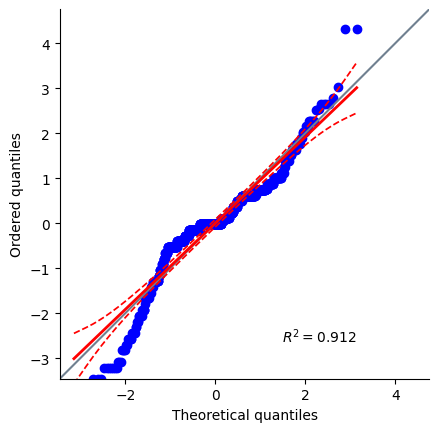

In [46]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

formula = 'AGE ~ CLASS'

model = ols(formula, data=df).fit()
res = model.resid

# QQ plot (quantile-quantile plot)

ax = pg.qqplot(res, dist='norm')
sns.despine()


The coefficient of correlation $R^2$ indicates that the data is very close to the normal distribution. The discrepancy can be due to various reasons, like the fact that this coefficient does not consider the distribution of the residuals, the presence of outliers or the non-homoscedasticity of the data.

Since the data is not normally distributed and the variance is not homogeneous, we use the Kruskal-Wallis test instead of the one-way ANOVA.

In [ ]:
#kruskal-wallis test (if the data is not normally distributed)

results = []

for var in  variables:
    res = pg.kruskal(data=df, 
        dv=var, 
        between='CLASS')
    res['variable'] = var
    results.append(res)

results_df = pd.concat(results, ignore_index = True)

# results: degrees of freedom, H statistic, uncorrected p-value, variable

print(results_df)

  Source  ddof1           H         p-unc variable
0  CLASS      2  196.168160  2.527117e-43      AGE
1  CLASS      2  272.864186  5.601378e-60      BMI
2  CLASS      2   43.635563  3.347016e-10     Chol
3  CLASS      2  286.329535  6.673160e-63    HbA1c


As before, with $ \alpha = 0.05 $, we reject all four of the null hypoteses and we accept the alternative hypoteses. We can conclude that the gender, age, glucose and cholesterol levels of the patients all influence the risk of developing diabetes.

## Predictive Analytics

We will now build a machine learning model, to try and predict the patient's class (and therefore the diabetes status) based on various combinations of the factors we have in our dataframe.

### Pre-Processing

The first step is to select some rows of the dataframe, to balance out the number of rows for every class. As a matter of fact, the dataframe as it is now has much more data about diabetic patients (Class 2), and we risk that our model learns to predict a diabetes diagnosis based exclusively on the fact that it is so predominant.

In [49]:
# reduce the number of rows to balance the number of patients of every class
from imblearn.under_sampling import RandomUnderSampler, ClusterCentroids

def select_rows_random(df, X, y):
    dict_sample_sizes = {0: 90, 1: 40, 2: 120}
    X_res, y_res = RandomUnderSampler(sampling_strategy=dict_sample_sizes, random_state=42).fit_resample(X, y)
    return X_res, y_res

def select_rows_cc(df, X, y):
    dict_sample_sizes = {0: 65, 1: 20, 2: 120}
    X_res, y_res = ClusterCentroids(sampling_strategy=dict_sample_sizes, random_state=42).fit_resample(X, y)
    return X_res, y_res

### Building the model

We start by loading the training and validation data. For now, we'll use all the columns, minus the 'CLASS' column, as features.

We can now apply the pre-processing step to the training data, while we leave the validation data as is. This is done to validate the model on real-world data.

In [ ]:
from sklearn.model_selection import train_test_split

# select features and target
X = df.drop(columns=['CLASS'])
y = df['CLASS']

X_train, X_valid, y_train, y_valid = train_test_split(X, y)

# X, y = select_rows_random(df, X, y)
X_train, y_train = select_rows_cc(df, X_train, y_train)

We can now build a simple model using logistic regression, given the need to classify patients in the three classes (diabetic, non diabetic or predict-diabetic). 

In [ ]:
from sklearn import datasets, linear_model, metrics
from sklearn.metrics import f1_score, roc_auc_score
from sklearn.model_selection import StratifiedKFold, cross_validate

log_reg = linear_model.LogisticRegression(max_iter=100000, random_state=0)

# ensure that the class proportion is maintained
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

scoring = {
    "f1": "f1_weighted",
    "accuracy": "accuracy",
    "precision": "precision_weighted",
    "recall": "recall_weighted",
    "roc_auc": "roc_auc_ovr"
}

results_scores = cross_validate(log_reg, X, y, cv=cv, scoring=scoring)

Now we check the model performance. We could use the accuracy (the number of the correct predictions), but that number is reliable only when there is no class imbalance. Instead, we check the F1 score contained in results_scores, a metric that takes into account not only the number of errors but also the type of errors (differentiating between False Positives and False Negatives). This helps offset the class imbalance.

In [52]:
print("F1 per fold:", results_scores['test_f1'])
print("F1 Mean:", results_scores['test_f1'].mean())

F1 per fold: [0.92009738 0.87090048 0.93569731 0.89814613 0.90278686]
F1 Mean: 0.9055256308627527


Given the fact that the mean F1 score over the folds is above 0.9, the model performance is quite good.

We can also calculate another score, the ROC-AUC score (Receiver Operating Characteristic Area Under the Curve). This metric plots the True Positive rate (TPR) against the False Positive rate (FPR) and measures the area under the resulting curve, getting a single number that summarizes the classifier's performance across all possible classification thresholds.

The ROC-AUC score is used in binary classification. Given the fact that we are analyzing three classes, we can use the One vs Rest method, which compares every class to all the others.

In [53]:
print("ROC-AUC (One vs Rest) per fold:", results_scores['test_roc_auc'])
print("ROC-AUC (One vs Rest) Mean:", results_scores['test_roc_auc'].mean())

ROC-AUC (One vs Rest) per fold: [0.98356455 0.94194185 0.97494265 0.9518686  0.95783405]
ROC-AUC (One vs Rest) Mean: 0.9620303362719458


The mean ROC-AUC score over the folds is also above 0.9.

### Testing the features

Now we can try testing this model on different sets of features. We will use permutation importance, a method that randomly shuffles a single column of the validation data, leaving the target and all other columns in place. The predictions that vary a lot are the most influential with the model being examined.

In [ ]:
import eli5
from eli5.sklearn import PermutationImportance

log_reg.fit(X_train, y_train)

perm = PermutationImportance(log_reg, random_state=1).fit(X_valid, y_valid)
eli5.show_weights(perm, feature_names = X_valid.columns.tolist())

Weight,Feature
0.1401 ± 0.0061,HbA1c
0.0696 ± 0.0297,BMI
0.0068 ± 0.0077,AGE
0.0048 ± 0.0106,Chol
0.0039 ± 0.0039,TG
0.0010 ± 0.0197,Urea
0.0010 ± 0.0072,HDL
0.0010 ± 0.0039,Cr
0.0000 ± 0.0137,ID
0.0000 ± 0.0086,VLDL


We can see that the data that improves predictions the most is the blood glucose level, followed by the patient's BMI. The triglycerides level is the only other slighlty relevant data, but the rest of data do not improve the model predictive power.

With hypotesis testing we saw that age, gender and cholesterol also are correlated to a diabetes diagnosis. This discrepancy can be due to the fact that they effectively influence the risk of developing diabetes, but they are not used by the model because the diabetes diagnosis is better explained by blood glucose level and the patient's BMI.

# Observations

The final results are really good. In the Hypotesis Testing section, we obtain very low p-values, the highest being 3.347016e-10 for the impact of cholesterol level on diabetes diagnosis. In the Predictive Analytics section we similarly get very high metric values, both above 0.9. 

This seems too good to be true, and it is possibly due to the dataset, which could contain too polished data.